# Import library packages

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [45]:
data=pd.read_csv('Fraud.csv')

In [46]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data preprocessing

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [48]:
data.shape

(6362620, 11)

In [49]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [50]:
data.shape

(6362620, 11)

In [51]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

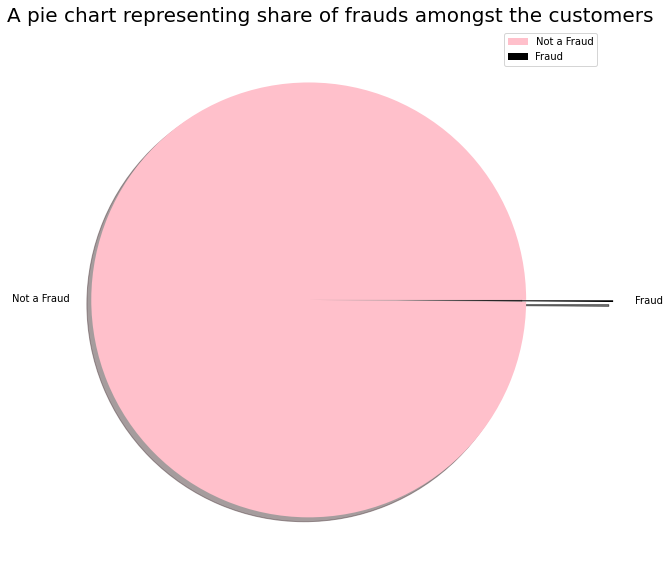

In [52]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.3]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [53]:
data.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [54]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

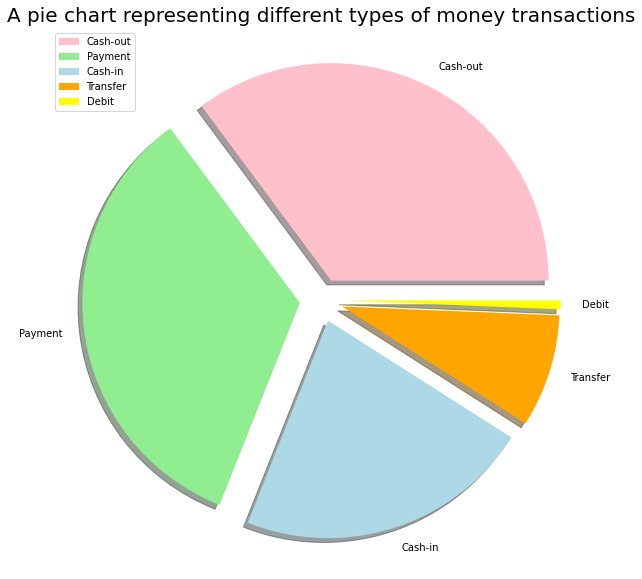

In [55]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [56]:
x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 428


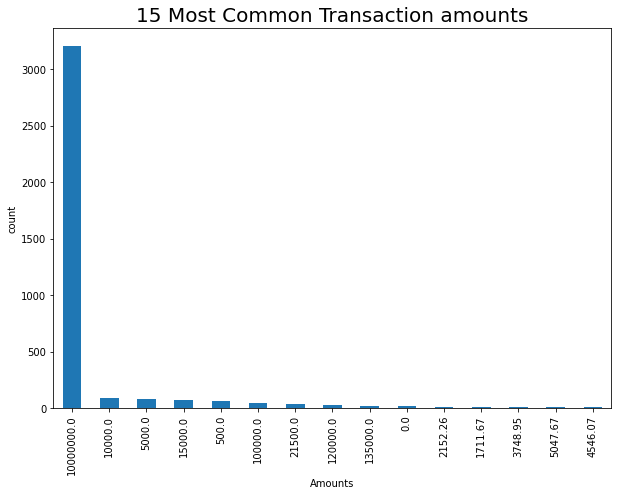

In [57]:
plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

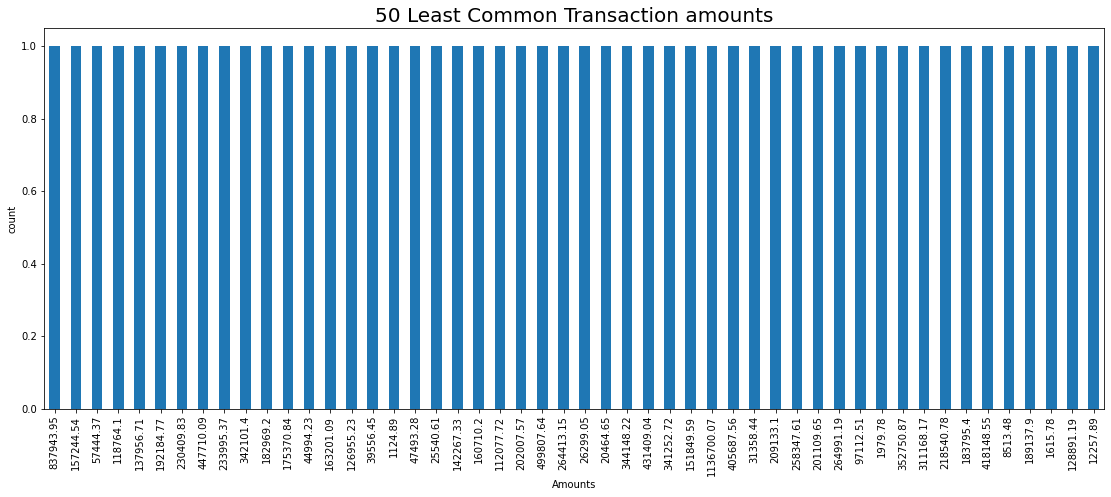

In [58]:
plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [59]:
print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [60]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [61]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [62]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0


In [63]:
data['nameDest'].value_counts().head(20)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
Name: nameDest, dtype: int64

In [64]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape

(2770409, 10)

In [65]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [66]:
X = X.drop(['nameDest','nameOrig'], axis = 1)

In [67]:
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [68]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0.00,54744.51


In [69]:
# checking if the dataset contains any NULL values
X.isnull().any().any()

False

# Exploratory data analysis

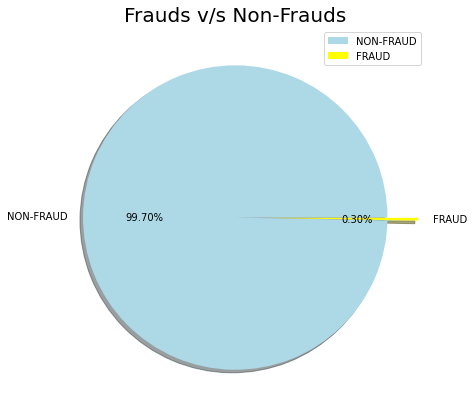

In [70]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds 

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [71]:
X['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [72]:
Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 9)
Shape of y:  (2770409,)


# Split the dataset

In [73]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [74]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2216327, 9)
Shape of x_test:  (554082, 9)
Shape of y_train:  (2216327,)
Shape of y_test:  (554082,)


In [75]:
y_train

4457796    0
5045851    0
2360412    0
4728490    0
1463763    0
          ..
5139614    0
2188950    0
5062777    0
3386091    0
696196     0
Name: isFraud, Length: 2216327, dtype: int64

In [76]:
data.shape

(6362620, 10)

# Feature engineering

In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [78]:
x_train.shape

(2216327, 9)

### Randomforest Classifier algorithms

In [36]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier(n_estimators=15, oob_score=False, n_jobs=-1, 
                           random_state=101, max_features=None, min_samples_leaf=30)  


In [37]:
rf.fit(x_train, y_train.values.ravel()) 

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=15,
                       n_jobs=-1, random_state=101)

In [38]:
y_pred = rf.predict(x_test)

In [39]:
rf_sco = accuracy_score(y_test, y_pred)
print("The Accuracy Score is", rf_sco)

The Accuracy Score is 0.9999675138336925


### Binary classification

In [89]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)


In [43]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.998350,0.506112,0.886510
Support Vector Machines,0.998183,0.399144,0.964549
Decision Trees,0.999980,0.998778,0.994522
Random Forest,0.999995,0.998778,0.999388
Naive Bayes,0.988173,0.410147,0.107206
K-Nearest Neighbor,0.999137,0.750000,0.946759


In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

# multiclass classification 

In [79]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [80]:
# Train logistic regression model
lr = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial')

In [81]:
# Predict on test set
y_pred1 = lr.predict(x_test)


In [82]:
# Define decision tree classifier
dt = DecisionTreeClassifier()

# Train decision tree model
dt.fit(x_train, y_train)

# Predict on test set
y_pred2 = dt.predict(x_test)

In [83]:
x_train.shape

(2216327, 9)

In [84]:
f=pd.DataFrame(x_train)
f

,0,1,2,3,4,5,6,7,8
0,0.572047,0.488100,-0.262154,-0.187924,-0.104314,-0.363837,-0.384580,-0.229804,0.04786
1,0.790925,0.488100,-0.092641,-0.187924,-0.104314,0.212948,0.168482,-0.057892,0.04786
2,-0.367011,0.488100,-0.343745,0.208883,0.466508,0.234522,0.140094,-0.326606,0.04786
3,0.635592,0.488100,-0.348131,-0.187924,-0.104314,-0.308008,-0.350564,-0.316998,0.04786
4,-0.720041,-2.048759,0.665809,-0.187924,-0.104314,0.624855,0.684945,0.711290,0.04786
...,...,...,...,...,...,...,...,...,...
2216322,0.805046,-2.048759,0.670372,-0.187924,-0.104314,-0.099251,0.032057,0.715918,0.04786
2216323,-0.402314,-2.048759,1.078647,-0.144552,-0.104314,-0.405228,-0.166369,1.117384,0.04786
2216324,0.790925,-2.048759,0.415264,-0.187924,-0.104314,0.310938,0.353768,0.457200,0.04786
2216325,0.091927,-2.048759,-0.136211,-0.187924,-0.104314,-0.311560,-0.313375,-0.102079,0.04786


In [85]:
x_test

array([[-1.38373583,  0.48810047, -0.20692641, ..., -0.13325022,
        -0.17379513,  0.04786025],
       [ 0.62853138,  0.48810047, -0.30677334, ..., -0.43045543,
        -0.28198922,  0.04786025],
       [-1.44022052,  0.48810047, -0.32298006, ..., -0.43649747,
        -0.32660602,  0.10467302],
       ...,
       [-0.56470777,  0.48810047, -0.23769108, ...,  0.32490626,
        -0.20499516,  0.04786025],
       [ 1.07334834,  0.48810047, -0.12252529, ...,  0.0125319 ,
        -0.15151044,  0.04786025],
       [ 0.07780562,  0.48810047, -0.2524066 , ..., -0.19461563,
        -0.21991891,  0.04786025]])

## decision tree accuracy

In [86]:
# decision tree
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9999675138336925
Precision: 0.9999674962266971
Recall: 0.9999675138336925


## Logistic regression accuracy

In [87]:
#Logistic regression
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1, average="weighted")
recall1= recall_score(y_test, y_pred1, average="weighted")

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)


Accuracy: 0.9983486198793681
Precision: 0.9982056854100321
Recall: 0.9983486198793681


In [88]:
test_vector =lr.predict(np.array([[0.572047,0.488100,-0.262154,-0.187924,-0.104314,-0.363837,-0.384580,-0.229804,0.04786]]))
print(test_vector)
if test_vector[0]==1:
    print("online fraud Detected")
else:
    print("fraud not Detected")

[0]
fraud not Detected
